Penn Interactive Data Challange

Lindsay Feltz

In [1]:
#import packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import math
from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from tensorflow.keras.callbacks import EarlyStopping
from math import sqrt
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, LSTM
from tensorflow.keras.optimizers import Adam

In [2]:
#read in data
df = pd.read_csv('Bitcoin.csv')
df.head()

,time_period_start,time_period_end,time_open,time_close,price_open,price_high,price_low,price_close,volume_traded,trades_count
0,2020-01-01T00:00:00.0000000Z,2020-01-01T00:00:01.0000000Z,2020-01-01T00:00:00.2222560Z,2020-01-01T00:00:00.8221530Z,7165.72,7165.72,7165.71,7165.71,0.021841,2
1,2020-01-01T00:00:01.0000000Z,2020-01-01T00:00:02.0000000Z,2020-01-01T00:00:01.9490000Z,2020-01-01T00:00:01.9530000Z,7168.30,7168.30,7168.30,7168.30,1.000000,2
2,2020-01-01T00:00:02.0000000Z,2020-01-01T00:00:03.0000000Z,2020-01-01T00:00:02.5550000Z,2020-01-01T00:00:02.5550000Z,7170.50,7170.50,7170.50,7170.50,0.002000,1
3,2020-01-01T00:00:04.0000000Z,2020-01-01T00:00:05.0000000Z,2020-01-01T00:00:04.1710000Z,2020-01-01T00:00:04.5600000Z,7169.20,7169.20,7169.20,7169.20,0.004000,2
4,2020-01-01T00:00:05.0000000Z,2020-01-01T00:00:06.0000000Z,2020-01-01T00:00:05.3790000Z,2020-01-01T00:00:05.3790000Z,7169.20,7169.20,7169.20,7169.20,0.002000,1


In [3]:
#check dataframe shape
df.shape

(10000, 10)

In [4]:
#print & find null values
print('Null Values: ', df.isnull().values.sum())

Null Values:  0


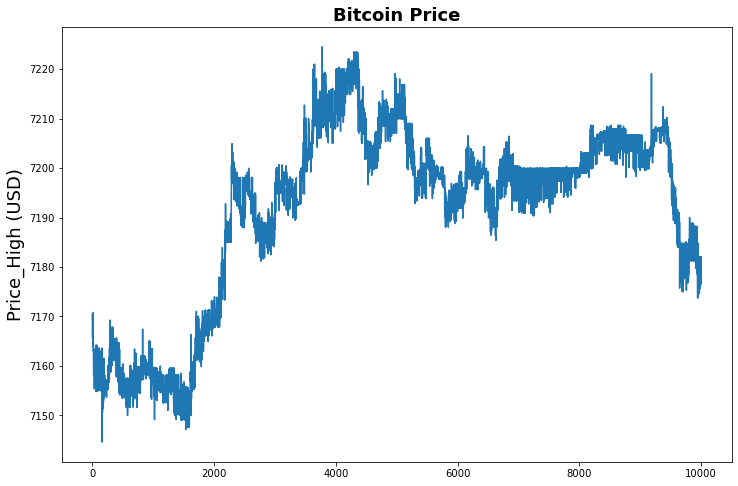

In [5]:
#plot all data
plt.figure(figsize = (12,8))
plt.plot(df['price_high'])
plt.title('Bitcoin Price', fontsize = 18, fontweight = 'bold')
plt.ylabel('Price_High (USD)', fontsize = 18)

plt.show()

In [6]:
#Scale Data
min_max_scaler = preprocessing.MinMaxScaler(feature_range=(0, 1))
dataset = min_max_scaler.fit_transform(df['price_high'].values.reshape(-1, 1))

In [7]:
#first 10 items of dataset
dataset[0:10]

array([[0.26404705],
       [0.29633338],
       [0.32386435],
       [0.30759605],
       [0.30759605],
       [0.30759605],
       [0.26404705],
       [0.26404705],
       [0.26404705],
       [0.26404705]])

In [8]:
# split into train and test sets (70/30 split)
train_size = int(len(dataset) * 0.7)
test_size = len(dataset) - train_size
train, test = dataset[0:train_size,:], dataset[train_size:len(dataset),:]
print(len(train), len(test))

7000 3000


In [9]:
#lookback = 60
# convert array into matrix
def create_dataset(dataset, look_back=60):
    dataX, dataY = [], []
    for i in range(len(dataset)-look_back-1):
        a = dataset[i:(i+look_back), 0]
        dataX.append(a)
        dataY.append(dataset[i + look_back, 0])
    return np.array(dataX), np.array(dataY)

In [10]:
x_train, y_train = create_dataset(train, look_back=60)
x_test, y_test = create_dataset(test, look_back=60)

In [11]:
#check shapes
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(6939, 60)
(6939,)
(2939, 60)
(2939,)


In [12]:
#Reshape to match needed format for LSTM model
x_train = np.reshape(x_train, (x_train.shape[0], 1, x_train.shape[1]))
x_test = np.reshape(x_test, (x_test.shape[0], 1, x_test.shape[1]))

In [13]:
# build and fit the LSTM model
look_back = 60
adamOpti = Adam(lr = 0.0001)

model = Sequential()
model.add(LSTM(20, input_shape=(1, look_back)))
#model.add(Dense(16, input_shape=(1, look_back)))
model.add(Dropout(0.2))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer=adamOpti)


## callbacks
early_stopping = EarlyStopping(
    monitor='val_loss',
    mode='auto',
    restore_best_weights=True
)


history = model.fit(
    x_train,
    y_train,
    validation_split=.2,
    epochs=25,
    verbose=2
)


/Users/mullinss/opt/anaconda3/lib/python3.9/site-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)
2022-02-03 17:40:42.516454: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


Epoch 1/25
174/174 - 4s - loss: 0.1214 - val_loss: 0.0037 - 4s/epoch - 21ms/step
Epoch 2/25
174/174 - 1s - loss: 0.0135 - val_loss: 8.7313e-04 - 639ms/epoch - 4ms/step
Epoch 3/25
174/174 - 0s - loss: 0.0120 - val_loss: 8.5929e-04 - 486ms/epoch - 3ms/step
Epoch 4/25
174/174 - 1s - loss: 0.0100 - val_loss: 9.2289e-04 - 565ms/epoch - 3ms/step
Epoch 5/25
174/174 - 1s - loss: 0.0093 - val_loss: 8.4663e-04 - 1s/epoch - 6ms/step
Epoch 6/25
174/174 - 1s - loss: 0.0084 - val_loss: 8.2869e-04 - 544ms/epoch - 3ms/step
Epoch 7/25
174/174 - 0s - loss: 0.0077 - val_loss: 8.1035e-04 - 460ms/epoch - 3ms/step
Epoch 8/25
174/174 - 0s - loss: 0.0070 - val_loss: 8.3053e-04 - 445ms/epoch - 3ms/step
Epoch 9/25
174/174 - 0s - loss: 0.0064 - val_loss: 8.0219e-04 - 448ms/epoch - 3ms/step
Epoch 10/25
174/174 - 0s - loss: 0.0063 - val_loss: 7.9146e-04 - 442ms/epoch - 3ms/step
Epoch 11/25
174/174 - 0s - loss: 0.0060 - val_loss: 7.4745e-04 - 466ms/epoch - 3ms/step
Epoch 12/25
174/174 - 0s - loss: 0.0057 - val_loss

In [14]:
#calculate RMSE

trainPredict = model.predict(x_train)
testPredict = model.predict(x_test)
# invert predictions
trainPredict = min_max_scaler.inverse_transform(trainPredict)
trainY = min_max_scaler.inverse_transform([y_train])
testPredict = min_max_scaler.inverse_transform(testPredict)
testY = min_max_scaler.inverse_transform([y_test])
# calculate root mean squared error
trainScore = math.sqrt(mean_squared_error(trainY[0], trainPredict[:,0]))
print('Train Score: %.2f RMSE' % (trainScore))
testScore = math.sqrt(mean_squared_error(testY[0], testPredict[:,0]))
print('Test Score: %.2f RMSE' % (testScore))


Train Score: 2.37 RMSE
Test Score: 1.93 RMSE


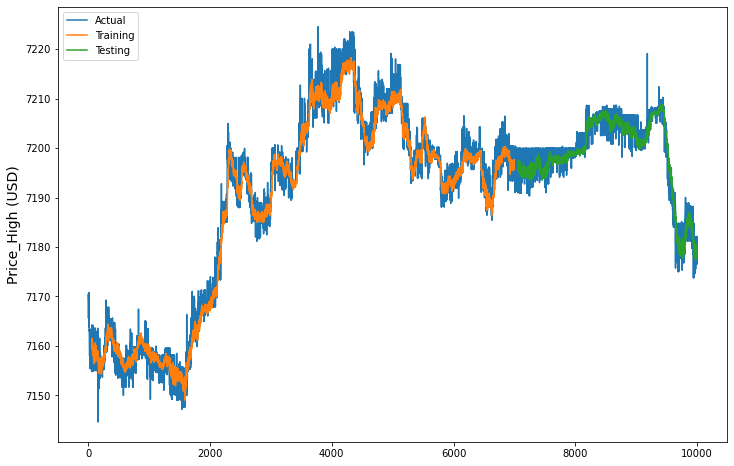

In [15]:
# shift train predictions for plotting
trainPredictPlot = np.empty_like(dataset)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(trainPredict)+look_back, :] = trainPredict
# shift test predictions for plotting
testPredictPlot = np.empty_like(dataset)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(trainPredict)+(look_back*2)+1:len(dataset)-1, :] = testPredict

# plot actuals and predictions
plt.figure(figsize=(12,8))
plt.plot(min_max_scaler.inverse_transform(dataset), label = "Actual")
plt.plot(trainPredictPlot, label = "Training")
plt.plot(testPredictPlot, label = "Testing")
plt.legend(loc='best')
plt.ylabel('Price_High (USD)', fontsize = 14)

plt.show()

Text(0.5, 1.0, 'Train Dataset')

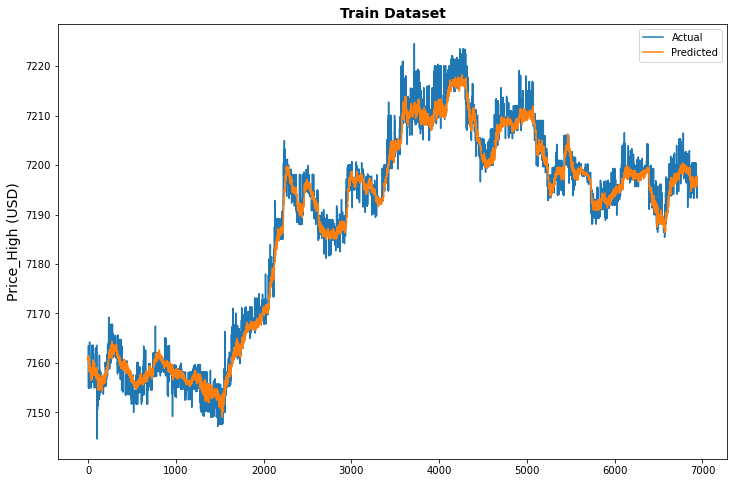

In [16]:
#plot only train dataset

plt.figure(figsize=(12,8))
plt.plot(min_max_scaler.inverse_transform(y_train.reshape(-1,1)), label="Actual")
plt.plot((trainPredict), label="Predicted")
plt.legend()
plt.ylabel('Price_High (USD)', fontsize = 14)
plt.title("Train Dataset", fontsize = 14, fontweight = 'bold')

Text(0.5, 1.0, 'Test Dataset')

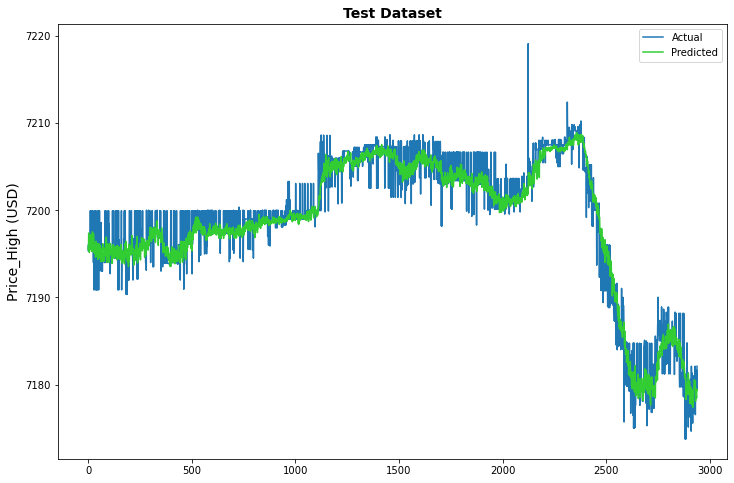

In [17]:
#plot only test dataset

plt.figure(figsize=(12,8))
plt.plot(min_max_scaler.inverse_transform(y_test.reshape(-1,1)), label="Actual")
plt.plot((testPredict), label="Predicted", color = 'limegreen')
plt.legend()
plt.ylabel('Price_High (USD)', fontsize = 14)
plt.title("Test Dataset", fontsize = 14, fontweight = 'bold')

In [18]:
#predictions
testPredict

array([[7195.776 ],
       [7195.4604],
       [7197.387 ],
       ...,
       [7178.474 ],
       [7179.485 ],
       [7179.343 ]], dtype=float32)